In [168]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LinearRegression

In [169]:
df = pd.read_csv('./datas/Life Style Data.csv').drop(columns=['Burns Calories (per 30 min)_bc','meal_name'])

In [170]:
cols = df.columns[df.dtypes.eq('object')]
for c in cols:
    df[c] = df[c].astype('category').cat.codes
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns_Calories_Bin
0,34.91,1,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,2,...,24.870447,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,2
1,23.37,0,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,1,...,23.479709,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,0
2,33.20,0,58.98,1.67,175.04,123.95,54.96,0.91,802.26,0,...,21.148123,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,0
3,38.69,0,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,1,...,32.449827,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,0
4,45.09,1,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,2,...,14.831372,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,46.77,0,98.31,1.90,199.20,148.18,63.72,0.77,761.61,2,...,27.232687,1882.80,0.500000,0.954837,0.623413,0.743876,1865.39,71.269345,533.2558,2
19996,40.38,0,88.12,1.87,196.18,134.18,54.04,1.97,2303.13,2,...,25.199462,1205.47,0.496968,0.689060,0.563810,0.683964,173.87,65.049689,1310.6016,1
19997,50.31,1,46.20,1.67,163.34,157.92,61.65,1.36,1468.80,2,...,16.565671,1947.79,0.500280,2.105844,0.946701,0.966818,-43.80,35.420708,957.9568,0
19998,52.36,1,44.30,1.62,179.27,121.23,60.88,1.41,929.75,3,...,16.880049,1921.51,0.499940,2.190745,0.509756,0.676243,346.25,35.889260,928.4004,1


In [171]:
arr = np.array([[1,2]])
arr

array([[1, 2]])

In [172]:
arr[0][0] = 1000
arr[0][0]

np.int64(1000)

In [173]:
enc = OrdinalEncoder()
enc.fit(df)

,categories,'auto'
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [174]:
obj_cols = df.select_dtypes(include=['object']).columns


In [175]:
X,y = df.drop(columns='Calories_Burned'),df['Calories_Burned']
# split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [176]:
X_train.shape,y_train.shape

((16000, 51), (16000,))

In [177]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [178]:
y_test.mean()

np.float64(1268.5640550000003)

In [179]:
X_train_scaled[0][0]

np.float64(-0.9410326882337644)

<BarContainer object of 51 artists>

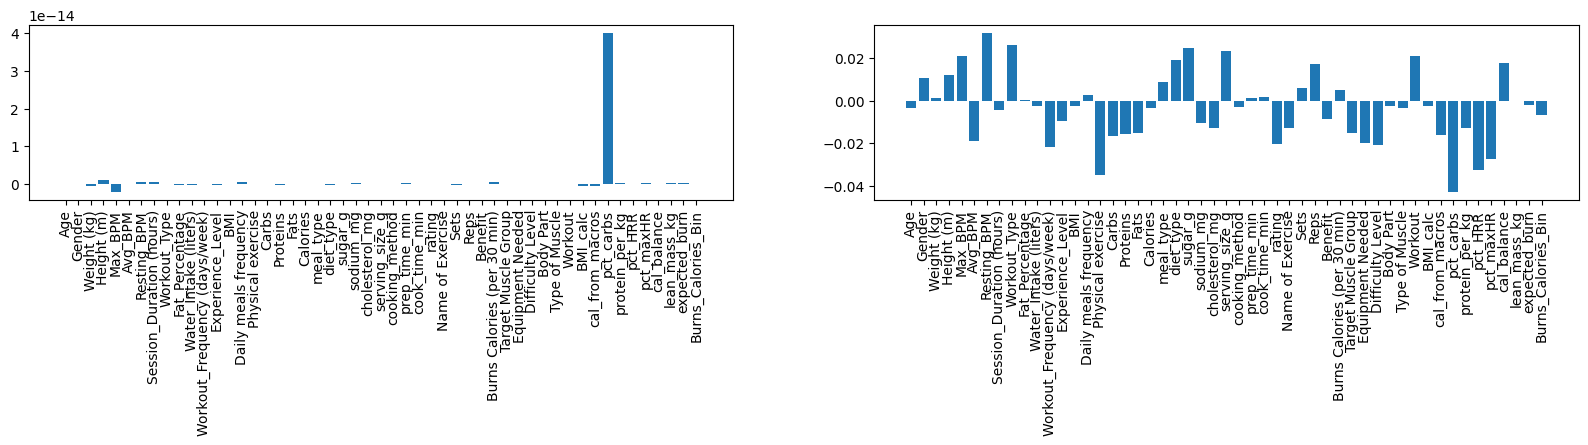

In [180]:
X_plt = df.drop(columns='Calories_Burned').columns
Y_plt = X_train_scaled.mean(axis=0)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
plt.subplot(2,2,1)
plt.xticks(rotation=90)
plt.bar(X_plt,Y_plt)

Y_plt2 = X_test_scaled.mean(axis=0)
plt.subplot(2,2,2)
plt.xticks(rotation=90)
plt.bar(X_plt,Y_plt2)





<BarContainer object of 2 artists>

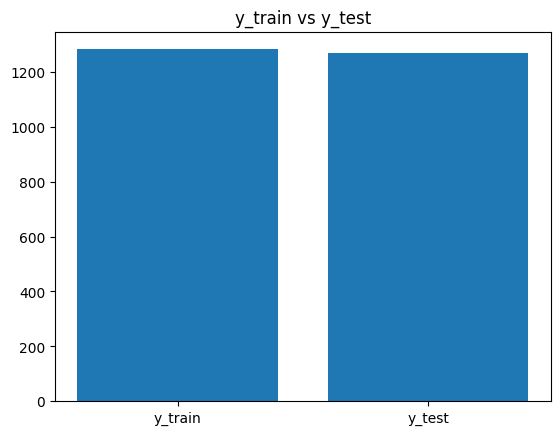

In [181]:
X_y = ('y_train','y_test')
Y_y1 = (y_train.mean(),y_test.mean())
plt.title('y_train vs y_test')
plt.bar(X_y,Y_y1)

In [182]:
type(X_plt),type(X_y)

(pandas.core.indexes.base.Index, tuple)

In [183]:
Y_plt

array([ 1.56319402e-16, -6.21724894e-18, -4.10338430e-16,  1.24167343e-15,
       -1.96287431e-15,  1.68753900e-16,  5.72875081e-16,  5.24913446e-16,
       -1.33226763e-17, -1.56319402e-16, -2.23820962e-16,  5.41788836e-17,
       -2.14050999e-16, -1.33226763e-18,  7.14983628e-16,  5.10702591e-17,
        5.77315973e-17, -8.17124146e-17,  8.52651283e-17,  1.78745907e-17,
        1.77635684e-17, -6.12843110e-17, -4.61852778e-17,  3.18189919e-16,
        1.50990331e-17,  3.37507799e-17,  1.95399252e-17,  3.23296945e-16,
        0.00000000e+00, -6.21724894e-18, -2.88657986e-17, -2.28705943e-16,
        9.45910017e-17, -5.32907052e-17,  6.93223257e-16, -1.19904087e-17,
        6.03961325e-17,  1.20792265e-16,  1.50990331e-17,  8.39328607e-17,
       -1.59872116e-17, -3.33510997e-16, -3.67705866e-16,  4.00879330e-14,
        3.11750625e-16,  3.06421555e-17,  2.37143638e-16, -1.90958360e-17,
        2.18491891e-16,  3.25073302e-16, -1.59872116e-17])

In [184]:
Y_plt[42]

np.float64(-3.6770586575585183e-16)

In [185]:
for d in X_train_scaled[42]:
    print(d)

1.3404001281710058
1.0048869409540495
-1.442508785586103
-0.25815234111589797
0.5064239151266132
-0.2494196928353054
-0.8324624636414086
-1.0567211720363996
-0.45351165117794695
-1.7919563394179026
-0.3923156219223571
-1.4283726868748063
-1.1002506569281738
-1.4573853498955054
0.2279340409132518
0.5340298345062058
-0.36889922095515737
-0.36553742951621443
-0.3893209310851472
-1.6861230069537931
-1.3417582138526545
-0.8858652494528957
0.09231131750419136
1.7259994171661397
-0.6563440774009152
-1.195640528971083
-1.4946007900782448
-1.406677218857785
-0.29286346724911017
-1.1272108214970165
-0.3065866246279493
0.9587396762913877
1.4981471985517338
1.6769706836053822
0.5658489595141285
0.7155611298952693
1.4553917425696936
1.2158347595736325
-0.9936715272482012
-0.2756741729763993
-0.26170203923881624
-1.457069962543923
-0.37440029931562485
0.45349482652167494
1.259419617854159
-0.35013371832560664
-0.493182832583971
-1.0000839290562256
-1.428094996745018
-0.8587807151676738
1.34087009641

In [186]:
for d in X_train_scaled[41]:
    print(d)

-0.8178237394681571
1.0048869409540495
2.1907174831398124
0.45042202788109903
1.515286585762817
1.6985145187851012
0.4067981732730269
-1.4092094060047085
1.3434636878134227
1.781896952851968
1.2741592764868999
-1.4503034628833362
-1.0866767104151887
1.9484835791097463
-1.3537381870306946
-0.492584072333391
-0.6541315510909702
-0.6551615041449347
-0.6743190603432226
1.8753712621409946
1.3462382078888904
-0.2980316399951016
-0.20808437076779684
-0.29910784096801174
-1.3254124546841886
-0.5918214591604166
-1.4946007900782448
1.5759757635458518
-1.3415176585129651
0.031098775816299457
-1.7001262009436195
-2.4579313525739
-1.2398669676438903
-1.348774125306202
-6.199857686167968
-1.6876466681761804
-0.7968996912539174
-0.006570427882577013
1.5107776766160783
0.5269194039549508
-0.19618029436633072
1.9490012974681974
-0.6604755300928143
0.559394613693576
-1.4387258894950914
0.5406113073541239
0.5030669197321116
2.4807324924611702
1.9501560004161784
-2.565834666625777
-0.4485224172557326


In [187]:
X_plt,Y_plt

(Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
        'Resting_BPM', 'Session_Duration (hours)', 'Workout_Type',
        'Fat_Percentage', 'Water_Intake (liters)',
        'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
        'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
        'Fats', 'Calories', 'meal_type', 'diet_type', 'sugar_g', 'sodium_mg',
        'cholesterol_mg', 'serving_size_g', 'cooking_method', 'prep_time_min',
        'cook_time_min', 'rating', 'Name of Exercise', 'Sets', 'Reps',
        'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
        'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
        'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
        'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
        'Burns_Calories_Bin'],
       dtype='object'),
 array([ 1.56319402e-16, -6.21724894e-18, -4.10338430e-16,  1.24167

In [188]:
a = np.array([[40, 10], [50, 11]])
a.mean(axis=0)

array([45. , 10.5])

In [189]:
for i,v in enumerate(Y_plt):
    if i>25:
        print(i,v)

26 1.9539925233402754e-17
27 3.232969447708456e-16
28 0.0
29 -6.217248937900877e-18
30 -2.886579864025407e-17
31 -2.2870594307278225e-16
32 9.459100169806333e-17
33 -5.329070518200751e-17
34 6.932232565759477e-16
35 -1.199040866595169e-17
36 6.039613253960852e-17
37 1.2079226507921704e-16
38 1.509903313490213e-17
39 8.393286066166184e-17
40 -1.5987211554602253e-17
41 -3.3351099659739703e-16
42 -3.6770586575585183e-16
43 4.008793297316515e-14
44 3.1175062531474394e-16
45 3.064215547965432e-17
46 2.3714363805993345e-16
47 -1.909583602355269e-17
48 2.184918912462308e-16
49 3.2507330161024583e-16
50 -1.5987211554602253e-17


In [190]:
print(X_plt[20])
print(len(Y_plt))

meal_type
51


In [191]:
regr = LinearRegression()
regr.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [192]:
regr.score(X_test_scaled,y_test)

1.0

In [193]:
X_test_scaled

array([[ 0.77479663,  1.00488694, -0.50429182, ..., -0.46168832,
         2.05391315,  0.44617384],
       [ 0.11161826, -0.99513683, -0.78566233, ..., -0.87457661,
        -0.14769522,  0.44617384],
       [-1.13618243,  1.00488694,  1.02551255, ...,  1.11431653,
         0.53146416, -0.44852242],
       ...,
       [-0.06120503, -0.99513683, -0.76863824, ..., -0.90884267,
         0.92838881, -0.44852242],
       [ 0.17694381,  1.00488694,  2.21152471, ...,  1.97244906,
        -2.25966656, -0.44852242],
       [ 0.929428  ,  1.00488694, -1.06514128, ..., -1.34045082,
         0.19260519, -1.34321867]], shape=(4000, 51))